# NYC Taxi Trip Duration
![title]("")

In [16]:
# import relevant libraries
import pandas as pd       
import numpy as np    

# pip install pandas-profiling
from pandas_profiling import ProfileReport
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

# For Geo spatial dimensions
from geopy.distance import great_circle

In [2]:
df=pd.read_csv("Datasets/nyc_taxi_trip_duration.csv")

In [3]:
"""
df.shape
df.columns
df.dtypes
"""

(729322, 11)

In [7]:
prof = ProfileReport(df,title='Pandas Profiling Report', explorative=True)
# To render profiling to the HTML File.
prof.to_file(output_file='output.html',)

In [9]:
# Render report into widgets in Notebook
# prof.to_widgets()

In [10]:
# Convert the datetime columns to Datetime format
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [11]:
# Extract features like "Month","Weekday","Day name","Day Hour" from the date time
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [12]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [14]:
# Apply function created to the column
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [18]:
# Function to take inputs as coordinates and return us the distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
     start_coordinates=(pickup_lat,pickup_long)
     stop_coordinates=(dropoff_lat,dropoff_long)

     return great_circle(start_coordinates,stop_coordinates).km

In [20]:
# Apply the function "Cal_distance " to the datasets
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],
                                                   x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

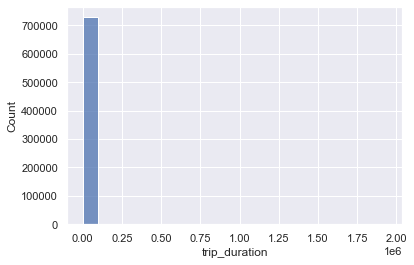

In [22]:
# Plotting histogram 
sns.histplot(df['trip_duration'],kde=False,bins=20)

<AxesSubplot:xlabel='trip_duration'>

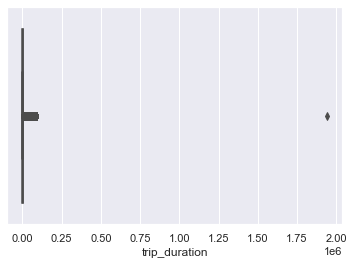

In [24]:
# Plotting Boxplot
sns.boxplot(df['trip_duration'])

In [25]:
df['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

In [26]:
# Removing the outliers
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

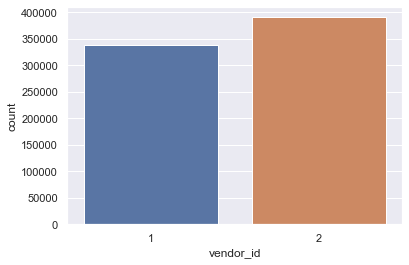

In [27]:
# Plotting Boxplot
sns.countplot(x='vendor_id',data=df)

In [28]:
df.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

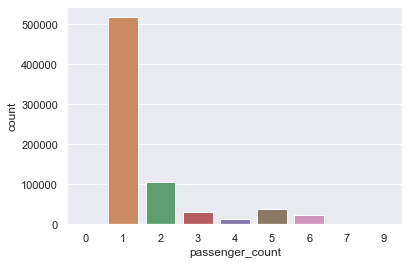

In [29]:
sns.countplot(x='passenger_count',data=df)

In [30]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [31]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

In [32]:
df['distance'].value_counts()

0.000000    2893
0.000424      24
0.000424      20
0.000424      17
0.001273      14
            ... 
0.492249       1
1.901582       1
2.324001       1
2.264054       1
1.419252       1
Name: distance, Length: 726215, dtype: int64

## Trips per day

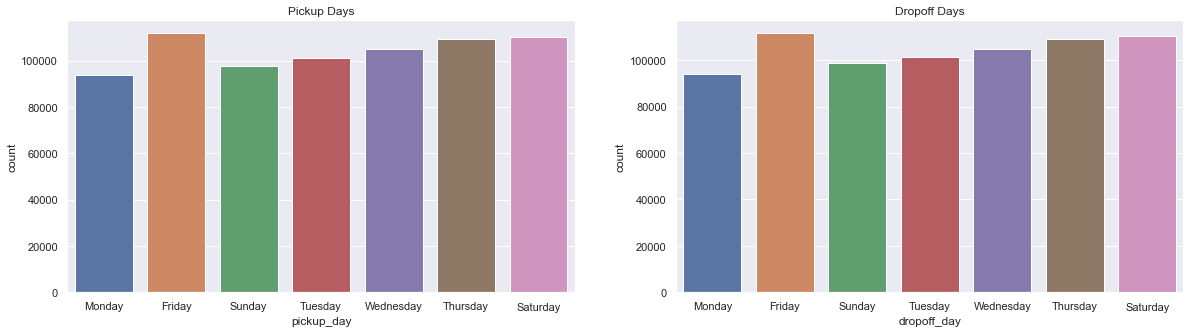

In [34]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

## Trips per Hour

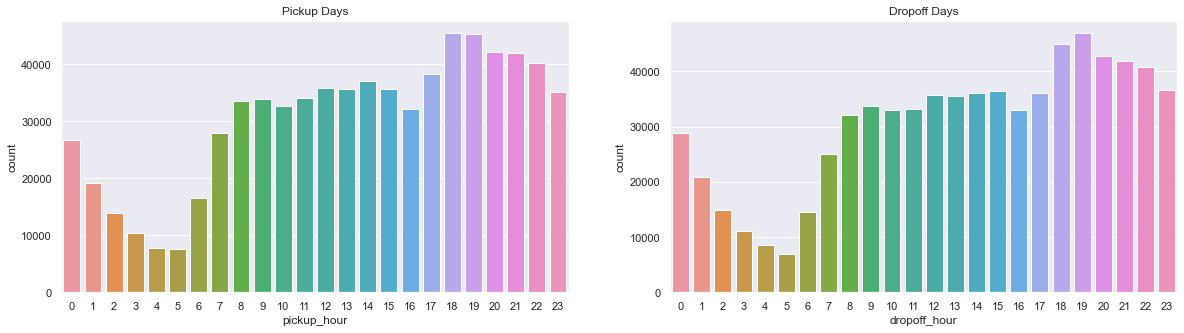

In [35]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax10)

## Trips per Time of Day

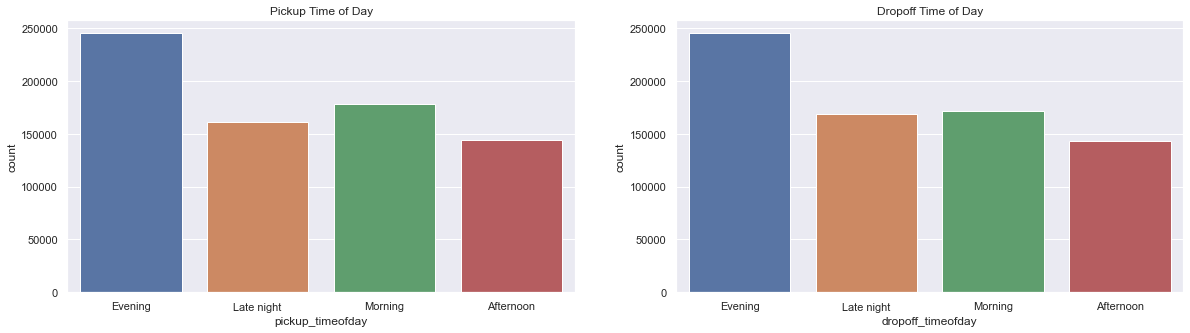

In [36]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

## Trips per month

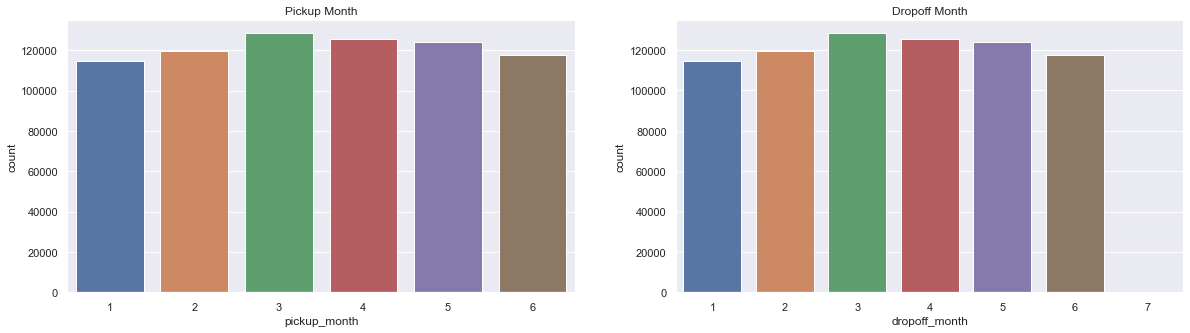

In [37]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax12)

## Trip Duration per Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

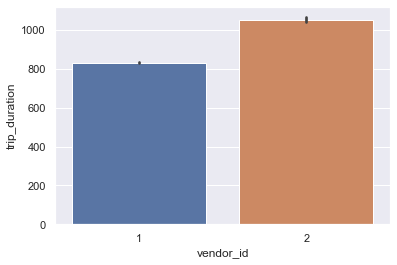

In [39]:
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

## Trip Duration per Store and Forward Flag

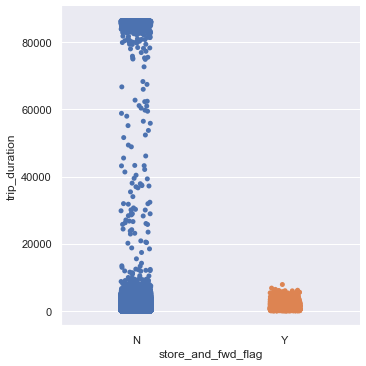

In [41]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind="strip")

## Trip Duration per passenger count

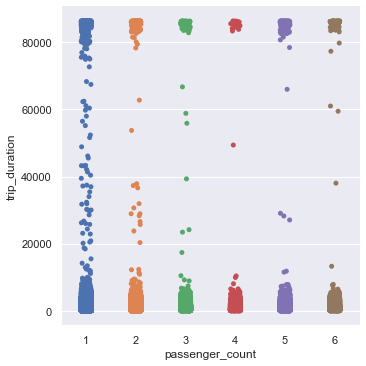

In [43]:
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind="strip")

## Trip Duration per hour


<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

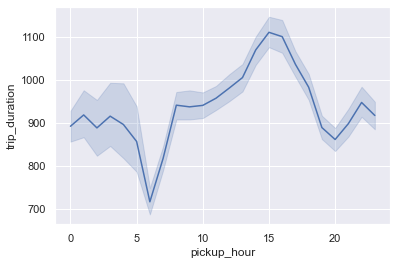

In [44]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)

## Trip Duration per time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

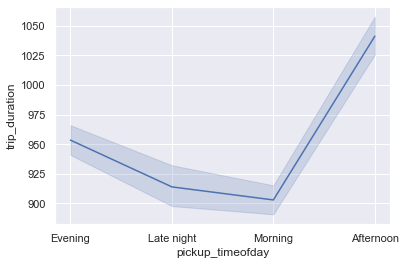

In [45]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=df)

## Trip Duration per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

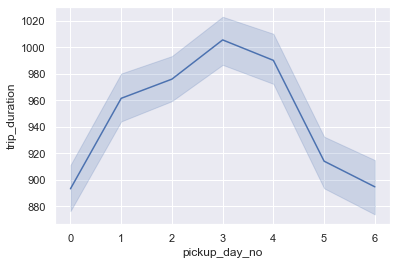

In [46]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=df)

## Trip Duration per month

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

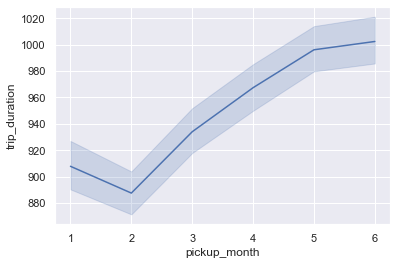

In [47]:
sns.lineplot(x='pickup_month',y='trip_duration',data=df)

## Distance and Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

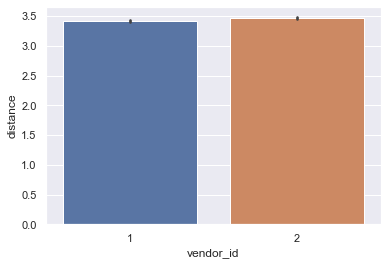

In [48]:
sns.barplot(y='distance',x='vendor_id',data=df,estimator=np.mean)

## Distance and Store and Forward Flag

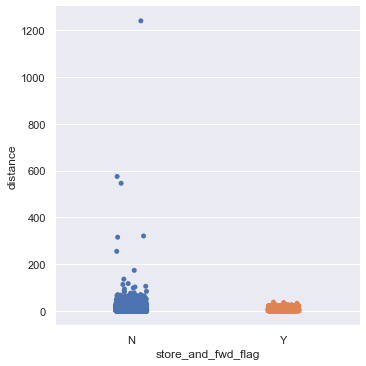

In [49]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind="strip")

## Distance per passenger count

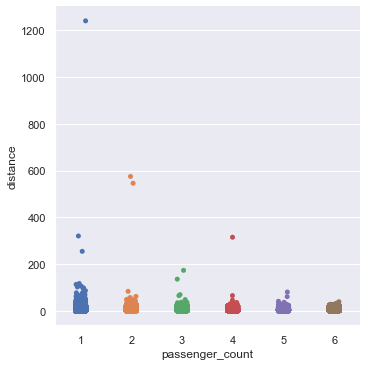

In [50]:
sns.catplot(y='distance',x='passenger_count',data=df,kind="strip")

## Distance per day of week

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

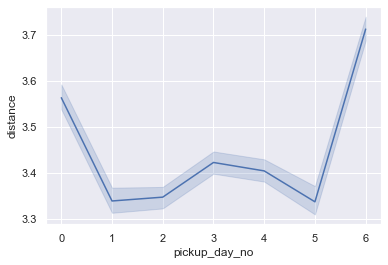

In [51]:
sns.lineplot(x='pickup_day_no',y='distance',data=df)

## Distance per hour of day

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

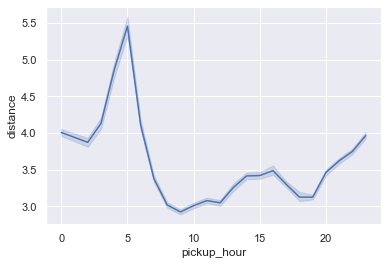

In [52]:
sns.lineplot(x='pickup_hour',y='distance',data=df)

## Distance per time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

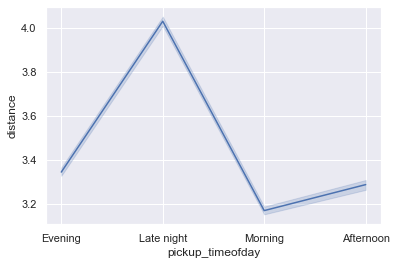

In [53]:
sns.lineplot(x='pickup_timeofday',y='distance',data=df)

## Distance per month

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

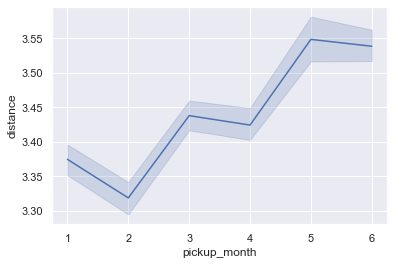

In [55]:
sns.lineplot(x='pickup_month',y='distance',data=df)

## Passenger Count and Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

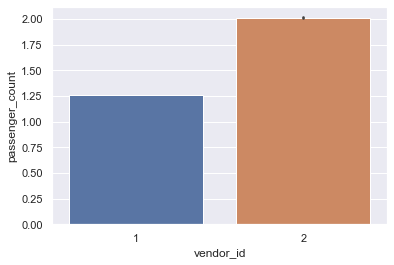

In [56]:
sns.barplot(y='passenger_count',x='vendor_id',data=df)

## Trip Duration and Distance

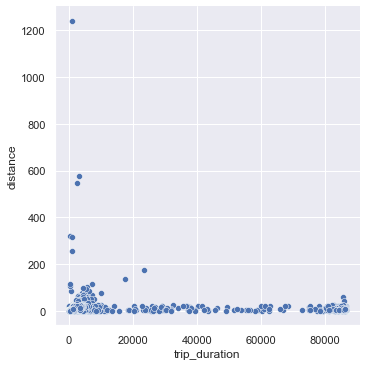

In [58]:
sns.relplot(y=df.distance,x='trip_duration',data=df)